In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import rc
from matplotlib import cm
from matplotlib import animation
import seaborn.apionly as sns

%matplotlib inline

In [2]:
rc('font', size=8)
rc('font', family='Arial')
rc('axes', linewidth=1)
rc('xtick.major', width=0.5, size=1.5)
rc('ytick.major', width=0.5, size=1.5)
rc('text.latex', preamble=[r"\usepackage{amsmath}"])
rc('mathtext', default='regular')

In [3]:
colors = ['#F9ED69', '#F08A5D', '#B83B5E', '#6A2C70']
colors.reverse()

# Figure 2a

In [4]:
chromatogram_df = pd.read_csv('../systematic_grid_data/grid.chromatograms.csv')

In [5]:
df = pd.read_csv('../systematic_grid_data/grid.results.csv')

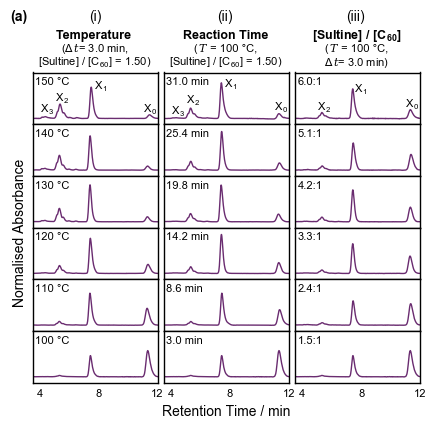

In [6]:
time_increase = list(reversed(df[(df.excess == 1.5) & (df.temperature == 100)].sort_values('time').index.tolist()))
excess_increase = list(reversed(df[(df.time == 3.0) & (df.temperature == 100)].sort_values('excess').index.tolist()))
temp_increase = list(reversed(df[(df.time == 3.0) & (df.excess == 1.5)].sort_values('temperature').index.tolist()))

time = chromatogram_df.time / 60

fig, axes = plt.subplots(figsize=(5, 4), ncols=3, nrows=6, sharex=True, sharey=True)

colors = colors

for temp_ind, ax in zip(temp_increase, axes[:,0]):
    area = np.trapz(chromatogram_df.ix[chromatogram_df.ix[:, temp_ind+1].notnull(), temp_ind+1])
    ax.plot(time, chromatogram_df.ix[:, temp_ind+1] / area, lw=1, color=colors[0])
    
    ax.get_yaxis().set_ticks([])
    ax.tick_params(axis=u'both', which=u'both',length=0)
    
    ax.text(0.02, 0.76, '%d \u00B0C' %(df.temperature.iloc[temp_ind]), transform=ax.transAxes, fontsize=8)


for excess_ind, ax in zip(excess_increase, axes[:,2]):
    area = np.trapz(chromatogram_df.ix[chromatogram_df.ix[:, excess_ind+1].notnull(), excess_ind+1])
    ax.plot(time, chromatogram_df.ix[:, excess_ind+1] / area, lw=1, color=colors[0])
    
    ax.get_yaxis().set_ticks([])
    ax.tick_params(axis=u'both', which=u'both',length=0)
    
    ax.text(0.02, 0.76, '%.1f:1' %(df.excess.iloc[excess_ind]), transform=ax.transAxes, fontsize=8)
    

for time_ind, ax in zip(time_increase, axes[:,1]):
    area = np.trapz(chromatogram_df.ix[chromatogram_df.ix[:, time_ind+1].notnull(), time_ind+1])
    ax.plot(time, chromatogram_df.ix[:, time_ind+1] / area, lw=1, color=colors[0])
    
    ax.get_yaxis().set_ticks([])
    ax.tick_params(axis=u'both', which=u'both',length=0)
    
    ax.text(0.02, 0.76, '%.1f min' %(df.time.iloc[time_ind]), transform=ax.transAxes, fontsize=8)
    
    
axes[0,0].text(7.7, 0.07,'Temperature', ha='center', fontweight='bold', fontsize=9)
axes[0,1].text(7.7, 0.07, 'Reaction Time',  ha='center', fontweight='bold', fontsize=9)
axes[0,2].text(7.7, 0.07, '[Sultine] / [C$_{60}$]', ha='center', fontweight='bold', fontsize=9)
axes[0,0].text(7.7, 0.058, '($\Delta$  = 3.0 min,', ha='center', fontsize=8)
axes[0,0].text(6.4, 0.058, 't', ha='center', style='italic', fontsize=8, fontname='DejaVu Serif')

axes[0,0].text(7.7, 0.046, '[Sultine] / [C$_{60}$] = 1.50)', ha='center', fontsize=8)

axes[0,1].text(7.7, 0.058, '(    = 100 \u00B0C,',  ha='center', fontsize=8)
axes[0,1].text(6.1, 0.058, 'T',  ha='center', fontsize=8, style='italic', fontname='DejaVu Serif')
axes[0,1].text(7.7, 0.046, '[Sultine] / [C$_{60}$] = 1.50)',  ha='center', fontsize=8)

axes[0,2].text(7.7, 0.058, '(    = 100 \u00B0C,', ha='center', fontsize=8)
axes[0,2].text(6.1, 0.058, 'T', ha='center', fontsize=8, style='italic', fontname='DejaVu Serif')
axes[0,2].text(7.7, 0.046, '$\Delta$  = 3.0 min)', ha='center', fontsize=8)
axes[0,2].text(6.25, 0.046, 't', ha='center', fontsize=8, style='italic', fontname='DejaVu Serif')


axes[0,0].set_xlim((3.5,12))
axes[0,0].set_ylim((-0.005, 0.04))
axes[0,0].get_xaxis().set_ticks([4, 8, 12])

axes[0,0].text(4, 0.005, 'X$_3$', fontsize=8)
axes[0,0].text(5, 0.015, 'X$_2$', fontsize=8)
axes[0,0].text(7.65, 0.025, 'X$_1$', fontsize=8)
axes[0,0].text(11, 0.005, 'X$_0$', fontsize=8)

axes[0,1].text(4, 0.004, 'X$_3$', fontsize=8)
axes[0,1].text(5, 0.013, 'X$_2$', fontsize=8)
axes[0,1].text(7.6, 0.027, 'X$_1$', fontsize=8)
axes[0,1].text(11, 0.007, 'X$_0$', fontsize=8)

axes[0,2].text(7.5, 0.023, 'X$_1$', fontsize=8)
axes[0,2].text(5, 0.007, 'X$_2$', fontsize=8)
axes[0,2].text(11, 0.01, 'X$_0$', fontsize=8)

fig.subplots_adjust(hspace=0, wspace=0.05)

axes[-1, 1].set_xlabel('Retention Time / min', fontsize=10)
fig.text(0.1, 0.5, 'Normalised Absorbance', rotation=90, ha='center', va='center', fontsize=10)

fig.text(0.08, 1.03, '(a)', fontsize=10, fontweight='bold')
fig.text(0.25, 1.03, '(i)', fontsize=10, ha='center')
fig.text(0.51, 1.03, '(ii)', fontsize=10, ha='center')
fig.text(0.77, 1.03, '(iii)', fontsize=10, ha='center')
fig.savefig('/home/barnaby/Dropbox/PhD/ReactorPaper/figures/figure2a_2.pdf', bbox_inches='tight')

# Figure 2b

In [7]:
duplicated = df.meas_id[df.duplicated('meas_id')]
clean_df = df
clean_df.head(10)
for ind in duplicated.tolist():
    means = clean_df[['NA','MA','BA','TA']][df.meas_id == ind].mean()
    first_loc = clean_df.index[df.meas_id == ind][0]
    clean_df.loc[first_loc, 'NA':'TA'] = means.values
    
clean_df = clean_df.drop(df.index[duplicated.index.tolist()])
clean_df = clean_df.reset_index(drop=True).sort_values('meas_id')

In [8]:
clean_df['stackMA'] = clean_df.MA + clean_df.NA
clean_df['stackBA'] = clean_df.stackMA + clean_df.BA
clean_df['stackTA'] = clean_df.stackBA + clean_df.TA
clean_df['zero'] = 0

In [9]:
from scipy.optimize import minimize

def guide(x, a, b, c):
    return a * np.exp(-(b * x)) + c

def mse(k, x, y):
    y_est = guide(x, k[0], k[1], k[2])
    mean_sq_err = np.sum((y_est - y)**2) / len(y)
    
    return mean_sq_err

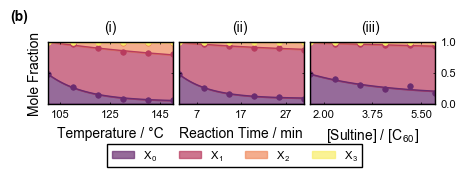

In [10]:
fig, axes = plt.subplots(figsize=(5, 0.8), ncols=3)
keys = ['zero','NA','stackMA','stackBA','stackTA']
held_values = [np.sort(df.temperature.unique())[0], np.sort(df.time.unique())[0], np.sort(df.excess.unique())[0]]
clean_df = clean_df.sort_values(by='meas_id')
colors = colors
alpha = 0.7
conditions = ['temperature', 'time', 'excess']
labels=(r'C$_{60}$','mono-adduct','bis-adduct','tris-adduct')

for i, condition in enumerate(conditions):
    to_plot = clean_df[(clean_df[conditions[i-1]] == held_values[i-1]) & \
                       (clean_df[conditions[(i+1) % 3]] == held_values[(i+1) % 3])]
    
    plot_fit = pd.DataFrame()
    plot_fit[condition] = np.linspace(to_plot[condition].min(), to_plot[condition].max(), 101)

    for key in keys:
        if i == 0:
            x0 = [200, 0.1, 0]
        else:
            x0 = [1, 0.1, 0]
            
        results = minimize(mse, x0, args=(to_plot[condition], to_plot[key]), options={'gtol': 1e-10})
        plot_fit[key] = guide(plot_fit[condition], results.x[0], results.x[1], 
                              results.x[2])
        
    plot_fit['zero'] = 0
    
    for j, color in enumerate(colors):
        axes[i].fill_between(plot_fit[condition].unique(), plot_fit[keys[j]], plot_fit[keys[j + 1]],
                             color=color, alpha=alpha, label=labels[j])
    legend = plt.legend(labels=(r'X$_0$','X$_1$','X$_2$','X$_3$'),
                        bbox_to_anchor=(0.28,-0.65,0.18,0.09), ncol=4, fontsize=8)
    legend.get_frame().set_linewidth(1)
    
    for j, color in enumerate(colors):
        axes[i].plot(plot_fit[condition], plot_fit[keys[j+1]], color=color, lw=1)
        axes[i].plot(to_plot[condition], to_plot[keys[j+1]], 'o', color=color, mec=color, markersize=4)
        
    axes[i].set_ylim(0, 1)
    axes[i].set_yticks([0, 0.5, 1])
    if i < 2:
        axes[i].set_yticklabels([])
    else:
        axes[i].tick_params(axis='y', which='both', labelleft='off', labelright='on')
    

axes[0].set_xticks([105, 125, 145])
axes[1].set_xlim(df.time.min(), df.time.max())
axes[0].set_xlim(df.temperature.min(), df.temperature.max())
axes[2].set_xlim(df.excess.min(), df.excess.max())
axes[1].set_xticks([7, 17, 27])
axes[2].set_xticks([2, 3.75, 5.5])

axes[0].set_ylabel('Mole Fraction', fontsize=10, labelpad=0)
axes[0].set_xlabel('Temperature / \u00B0C', fontsize=10)
axes[1].set_xlabel('Reaction Time / min', fontsize=10, labelpad=5)
axes[2].set_xlabel('[Sultine] / [C$_{60}$]', fontsize=10)

fig.subplots_adjust(hspace=0, wspace=0.05)

fig.text(0.05, 1.17, '(b)', fontsize=10, fontweight='bold')
fig.text(0.25, 1.03, '(i)', fontsize=10, ha='center')
fig.text(0.51, 1.03, '(ii)', fontsize=10, ha='center')
fig.text(0.77, 1.03, '(iii)', fontsize=10, ha='center')
fig.savefig('/home/barnaby/Dropbox/PhD/ReactorPaper/figures/figure2b_2.pdf', bbox_inches='tight')